```
    _/    _/  _/_/_/  _/       Numerical Simulation Laboratory
   _/_/  _/ _/       _/       Physics Department
  _/  _/_/    _/    _/       Universita' degli Studi di Milano
 _/    _/       _/ _/       Prof. D.E. Galli
_/    _/  _/_/_/  _/_/_/_/ email: Davide.Galli@unimi.it
```

# Lesson 7

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.constants

In [2]:
def error(ave, ave2, n):
    if n == 0:
        return 0
    #return np.sqrt(np.abs(ave2 - ave*ave) / n)
    return np.sqrt((ave2 - ave*ave) / n)

def blocks_value(data):
    total = 0.
    total2 = 0.
    y = np.zeros((len(data), 2))
    for i in range(len(data)):
        total = total + data[i]
        total2 = total2 + data[i]*data[i]
        ave = total / (i+1)
        ave2 = total2 / (i+1)
        y[i, 0] = ave
        y[i, 1] = error(ave, ave2, i)
    return y

def autocorrelation(x, nsteps):
    #chi = np.zeros(x.shape)
    chi = np.zeros(nsteps)
    den = np.var(x)
    #for i in range(len(x)):
    for i in range(nsteps):
        num = np.sum(x[:len(x)-i]*x[i:]) - np.sum(x[:len(x)-i]) * np.sum(x[i:]) / (len(x)-i)
        num = num / (len(x) - i)
        chi[i] = num / den
    return chi

## Exercise 7.1

In this exercise, we plot the autocorrelation between the samples in our simulation, in order to understand how many throws per block are needed to have non-correlated data in the block method.

In [3]:
N_blocks = 500000
solid = np.loadtxt("data/7.1-solid.dat")
liquid = np.loadtxt("data/7.1-liquid.dat")
gas = np.loadtxt("data/7.1-gas.dat")

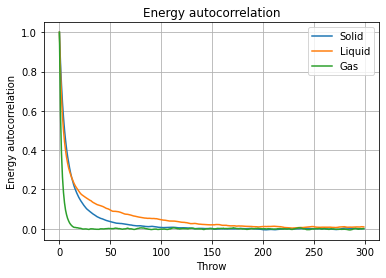

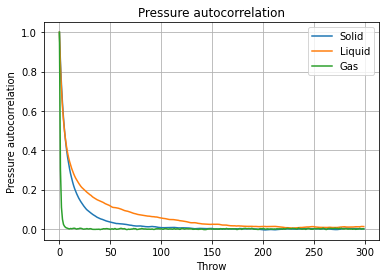

In [5]:
chi_solid = np.array([autocorrelation(solid[:, 0], 300), autocorrelation(solid[:, 1], 300)])
chi_liquid = np.array([autocorrelation(liquid[:, 0], 300), autocorrelation(liquid[:, 1], 300)])
chi_gas = np.array([autocorrelation(gas[:, 0], 300), autocorrelation(gas[:, 1], 300)])

plt.title("Energy autocorrelation")
plt.plot(chi_solid[0], label="Solid")
plt.plot(chi_liquid[0], label="Liquid")
plt.plot(chi_gas[0], label="Gas")
plt.xlabel("Throw")
plt.ylabel("Energy autocorrelation")
plt.grid(True)
plt.legend()
plt.show();

plt.title("Pressure autocorrelation")
plt.plot(chi_solid[1], label="Solid")
plt.plot(chi_liquid[1], label="Liquid")
plt.plot(chi_gas[1], label="Gas")
plt.xlabel("Throw")
plt.ylabel("Pressure autocorrelation")
plt.grid(True)
plt.legend()
plt.show();

The gas is the fastest to become uncorrelated, followed by the solid and then the liquid. All three phases become uncorrelated after about 200 throws.

We also study how the statistical error varies depending on the number of throws per block.

In [6]:
error_solid_U = np.zeros(500)
error_solid_P = np.zeros(500)
error_liquid_U = np.zeros(500)
error_liquid_P = np.zeros(500)
error_gas_U = np.zeros(500)
error_gas_P = np.zeros(500)

for N_throws_per_block in range(10, 5010, 10):
    error_solid_U[N_throws_per_block//10-1] = blocks_value(np.mean(solid[:N_blocks//N_throws_per_block*N_throws_per_block,0].reshape(-1, N_throws_per_block), axis=-1))[-1, 1]
    error_solid_P[N_throws_per_block//10-1] = blocks_value(np.mean(solid[:N_blocks//N_throws_per_block*N_throws_per_block,1].reshape(-1, N_throws_per_block), axis=-1))[-1, 1]
    error_liquid_U[N_throws_per_block//10-1] = blocks_value(np.mean(liquid[:N_blocks//N_throws_per_block*N_throws_per_block,0].reshape(-1, N_throws_per_block), axis=-1))[-1, 1]
    error_liquid_P[N_throws_per_block//10-1] = blocks_value(np.mean(liquid[:N_blocks//N_throws_per_block*N_throws_per_block,1].reshape(-1, N_throws_per_block), axis=-1))[-1, 1]
    error_gas_U[N_throws_per_block//10-1] = blocks_value(np.mean(gas[:N_blocks//N_throws_per_block*N_throws_per_block,0].reshape(-1, N_throws_per_block), axis=-1))[-1, 1]
    error_gas_P[N_throws_per_block//10-1] = blocks_value(np.mean(gas[:N_blocks//N_throws_per_block*N_throws_per_block,1].reshape(-1, N_throws_per_block), axis=-1))[-1, 1]

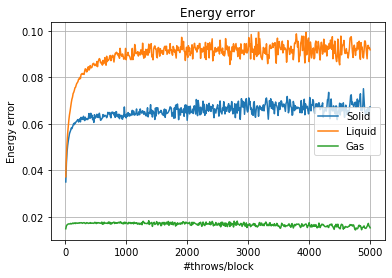

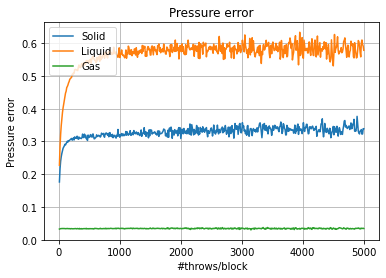

In [10]:
plt.title("Energy error")
plt.plot(range(10, 5010, 10), error_solid_U, label="Solid");
plt.plot(range(10, 5010, 10), error_liquid_U, label="Liquid");
plt.plot(range(10, 5010, 10), error_gas_U, label="Gas");
plt.xlabel("#throws/block")
plt.ylabel("Energy error")
plt.legend()
plt.grid(True)
plt.show()
plt.title("Pressure error")
plt.plot(range(10, 5010, 10), error_solid_P, label="Solid");
plt.plot(range(10, 5010, 10), error_liquid_P, label="Liquid");
plt.plot(range(10, 5010, 10), error_gas_P, label="Gas");
plt.xlabel("#throws/block")
plt.ylabel("Pressure error")
plt.legend()
plt.grid(True)
plt.show()

The error grows up to about 500 throws per block. Afterwards, it reaches stability (although with important fluctuations) around a constant median value.

Considering the plot of the error and the autocorrelation, a reasonable number for the throws per block can be 500, which is a compromise not to have a too computational demanding simulation.

## Exercise 7.2

In this exercise, we estimate the radial distribution distribution $g(r)$ using the NVT algorithm. This system is not equilibrated, since it is only used to verify that the $g(r)$ calculation is working. The real simulation is performed in exercise 7.4.

In [11]:
gofr_data = np.loadtxt("data/7.2-gofr.dat")

In [12]:
gofr = []
for i in range(100):
    gofr.append(blocks_value(gofr_data[:, i]))
gofr = np.array(gofr)

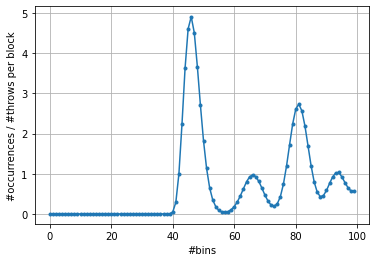

In [13]:
x = np.arange(100)
plt.grid(True)
plt.errorbar(x, gofr[:, -1, 0], yerr=gofr[:, -1, 1], ls="-", marker=".");
plt.xlabel("#bins")
plt.ylabel("#occurrences / #throws per block")
plt.show()

## Exercise 7.3

In this exercise, we estimate the radial distribution distribution $g(r)$ using the NVE algorithm. This system is not equilibrated, since it is only used to verify that the $g(r)$ calculation is working. The real simulation is performed in exercise 7.4.

In [14]:
gofr_data = np.loadtxt("data/7.3-gofr.dat")

In [15]:
gofr = []
for i in range(100):
    gofr.append(blocks_value(gofr_data[:, i]))
gofr = np.array(gofr)

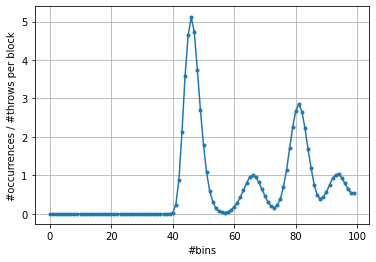

In [16]:
x = np.arange(100)
plt.grid(True)
plt.errorbar(x, gofr[:, -1, 0], yerr=gofr[:, -1, 1], ls="-", marker=".");
plt.xlabel("#bins")
plt.ylabel("#occurrences / #throws per block")
plt.show()

## Exercise 7.4

In this exercise, we simulate solid, liquid and gaseous Argon to find the radial distribution function $g(r)$ using both the NVT and NVE technique. For the NVT method, we also plot the energy and pressure block means (for the NVE, they are plotted in exercise 4.3).

In [17]:
nvt_solid_gofr_data = np.loadtxt("data/7.4-nvt-solid-gofr.dat")
nve_solid_gofr_data = np.loadtxt("data/7.4-nve-solid-gofr.dat")
solid_data = np.loadtxt("data/7.4-nvt-solid-measures.dat")
nvt_liquid_gofr_data = np.loadtxt("data/7.4-nvt-liquid-gofr.dat")
nve_liquid_gofr_data = np.loadtxt("data/7.4-nve-liquid-gofr.dat")
liquid_data = np.loadtxt("data/7.4-nvt-liquid-measures.dat")
nvt_gas_gofr_data = np.loadtxt("data/7.4-nvt-gas-gofr.dat")
nve_gas_gofr_data = np.loadtxt("data/7.4-nve-gas-gofr.dat")
gas_data = np.loadtxt("data/7.4-nvt-gas-measures.dat")

epsilonk = 120.
sigma = 0.34e-9
epsilon = epsilonk * scipy.constants.k
pr = epsilon / (sigma * sigma * sigma)

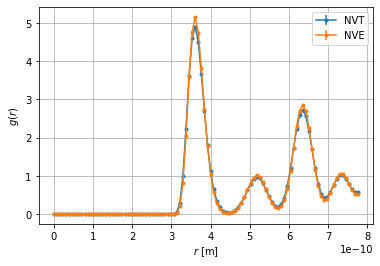

In [18]:
nvt_solid_gofr = []
for i in range(100):
    nvt_solid_gofr.append(blocks_value(nvt_solid_gofr_data[:, i]))
nvt_solid_gofr = np.array(nvt_solid_gofr)

nve_solid_gofr = []
for i in range(100):
    nve_solid_gofr.append(blocks_value(nve_solid_gofr_data[:, i]))
nve_solid_gofr = np.array(nve_solid_gofr)

x = np.arange(100) * 0.02306645 * sigma    # Converto to SI units
plt.errorbar(x, nvt_solid_gofr[:, -1, 0], yerr=nvt_solid_gofr[:, -1, 1], ls="-", marker=".", label="NVT");
plt.errorbar(x, nve_solid_gofr[:, -1, 0], yerr=nve_solid_gofr[:, -1, 1], ls="-", marker=".", label="NVE");
plt.xlabel("$r$ [m]")
plt.ylabel("$g(r)$")
plt.grid(True)
plt.legend()
plt.show()

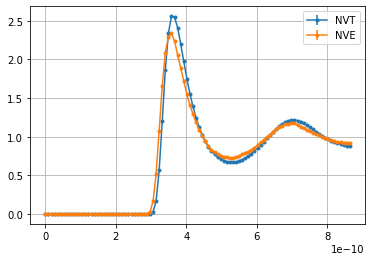

In [19]:
nvt_liquid_gofr = []
for i in range(100):
    nvt_liquid_gofr.append(blocks_value(nvt_liquid_gofr_data[:, i]))
nvt_liquid_gofr = np.array(nvt_liquid_gofr)

nve_liquid_gofr = []
for i in range(100):
    nve_liquid_gofr.append(blocks_value(nve_liquid_gofr_data[:, i]))
nve_liquid_gofr = np.array(nve_liquid_gofr)

x = np.arange(100) * 0.02564965 * sigma    # Converto to SI units
plt.errorbar(x, nvt_liquid_gofr[:, -1, 0], yerr=nvt_liquid_gofr[:, -1, 1], ls="-", marker=".", label="NVT");
plt.errorbar(x, nve_liquid_gofr[:, -1, 0], yerr=nve_liquid_gofr[:, -1, 1], ls="-", marker=".", label="NVE");
plt.grid(True)
plt.legend()
plt.show()

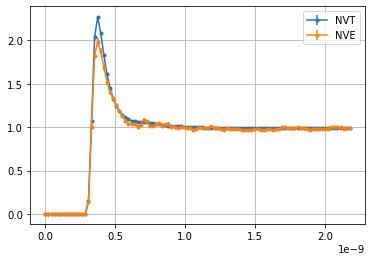

In [20]:
nvt_gas_gofr = []
for i in range(100):
    nvt_gas_gofr.append(blocks_value(nvt_gas_gofr_data[:, i]))
nvt_gas_gofr = np.array(nvt_gas_gofr)

nve_gas_gofr = []
for i in range(100):
    nve_gas_gofr.append(blocks_value(nve_gas_gofr_data[:, i]))
nve_gas_gofr = np.array(nve_gas_gofr)

x = np.arange(100) * 0.06463305 * sigma    # Converto to SI units
plt.errorbar(x, nvt_gas_gofr[:, -1, 0], yerr=nvt_gas_gofr[:, -1, 1], ls="-", marker=".", label="NVT");
plt.errorbar(x, nve_gas_gofr[:, -1, 0], yerr=nve_gas_gofr[:, -1, 1], ls="-", marker=".", label="NVE");
plt.grid(True)
plt.legend()
plt.show()

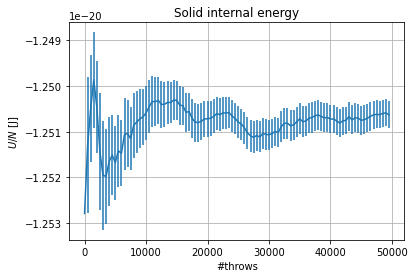

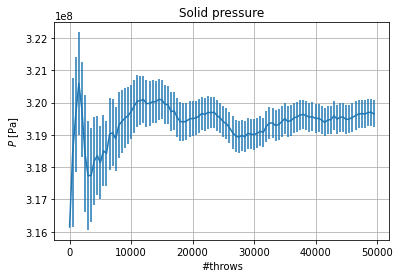

In [21]:
solid_U = blocks_value(solid_data[:, 0]) * epsilon
solid_P = blocks_value(solid_data[:, 1]) * pr
x = np.arange(100) * 500
plt.title("Solid internal energy")
plt.errorbar(x, solid_U[:, 0], yerr=solid_U[:, 1])
plt.xlabel("#throws")
plt.ylabel("$U/N$ [J]")
plt.grid()
plt.show()
plt.title("Solid pressure")
plt.errorbar(x, solid_P[:, 0], yerr=solid_P[:, 1])
plt.xlabel("#throws")
plt.ylabel("$P$ [Pa]")
plt.grid()
plt.show()

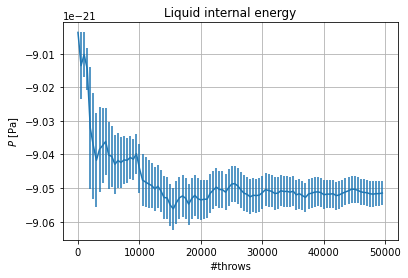

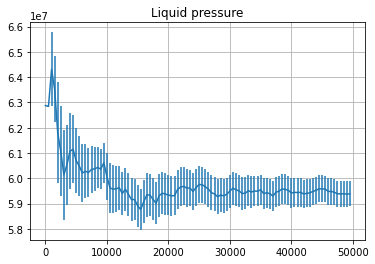

In [22]:
liquid_U = blocks_value(liquid_data[:, 0]) * epsilon
liquid_P = blocks_value(liquid_data[:, 1]) * pr
x = np.arange(100) * 500
plt.title("Liquid internal energy")
plt.errorbar(x, liquid_U[:, 0], yerr=liquid_U[:, 1])
plt.xlabel("#throws")
plt.ylabel("$U/N$ [J]")
plt.grid()
plt.xlabel("#throws")
plt.ylabel("$P$ [Pa]")
plt.show()
plt.title("Liquid pressure")
plt.errorbar(x, liquid_P[:, 0], yerr=liquid_P[:, 1])
plt.grid()
plt.show()

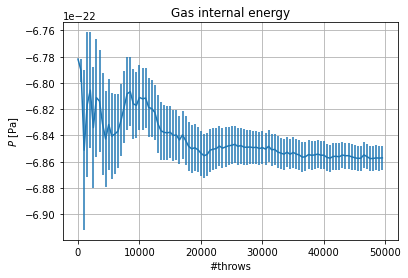

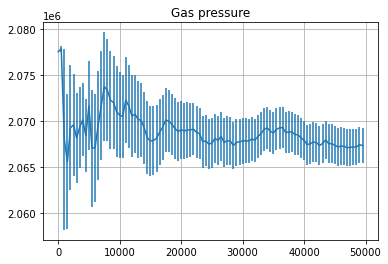

In [23]:
gas_U = blocks_value(gas_data[:, 0]) * epsilon
gas_P = blocks_value(gas_data[:, 1]) * pr
x = np.arange(100) * 500
plt.title("Gas internal energy")
plt.errorbar(x, gas_U[:, 0], yerr=gas_U[:, 1])
plt.xlabel("#throws")
plt.ylabel("$U/N$ [J]")
plt.grid()
plt.xlabel("#throws")
plt.ylabel("$P$ [Pa]")
plt.show()
plt.title("Gas pressure")
plt.errorbar(x, gas_P[:, 0], yerr=gas_P[:, 1])
plt.grid()
plt.show()

We obtain similar results for the NVT and NVE $g(r)$ distribution.